# Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [40]:
import pandas as pd
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [41]:
parsed_date.month

1

In [42]:
parsed_date.year

2017

In [43]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given in the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [44]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [45]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [46]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

The formatting abbreviations are actually part of the python standard. You can see examples at [this link](http://strftime.org/).

# Part 1 - Practice Parsing Dates

Run the code cells below to import the World Bank projects data. The last line of the code outputs all of the column names in the data frame.

In [47]:
# Run this code cell. Read in the projects data set with all columns type string
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [48]:
# Run this code cell
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


Use the pandas to_datetime method to convert the boardapprovaldate and closingdate columns into datetime objects.

In [49]:
# TODO: Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times.
# HINT: It's easier to do this one column at a time

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [50]:
# Run the code cells below to see how you can access the different parts of the datetime objects
# Series.dt gives access to the datetime object as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
df_projects['boardapprovaldate'].dt.year.head(5)

0    2018.0
1    2018.0
2    2018.0
3    2018.0
4    2018.0
Name: boardapprovaldate, dtype: float64

In [51]:
# Run this code cell to see the output
df_projects['boardapprovaldate'].dt.month.head(5)

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: boardapprovaldate, dtype: float64

In [52]:
# Run this code to see the output
# weekday represents the day of the week from 0 (Monday) to 6 (Sunday).
df_projects['boardapprovaldate'].dt.weekday.head(5)

0    3.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: boardapprovaldate, dtype: float64

In [53]:
df_projects['boardapprovaldate'].dt.day.head(5)

0    28.0
1    28.0
2    28.0
3    27.0
4    27.0
Name: boardapprovaldate, dtype: float64

# Part 2 - Create new columns

Now that the boardapprovaldate and closingdates are in datetime formats, create a few new columns in the df_projects data frame:
* approvalyear
* approvalday
* approvalweekday
* closingyear
* closingday
* closingweekday

In [54]:
### 
# TODO create the follwing new columns in the df_projects data frame
#
# approvalyear
# approvalday
# approvalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

In [55]:
df_projects['closingyear'].isna().sum()

3349

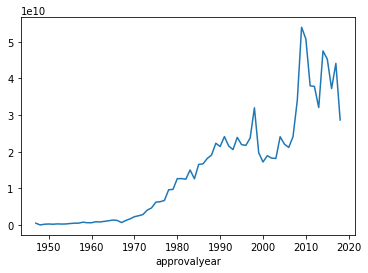

In [56]:
###
# TODO: Make a visualization with year on the x-axis and the sum of the totalamt columns per year on the y-axis
# HINT: The totalamt column is currently a string with commas. For example 100,250,364. You'll need to remove the
#         commas and convert the column to a numeric variable.
# HINT: pandas groupby, sum, and plot methods should also be helpful
####

import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Step 1 - convert the totalamt column from string to numeric. Be sure to remove the commas in this column
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',''))

# TODO: Step 2 - calculate the sum of the totalamt column by year and plot the results with a line plot
df_projects.groupby(by='approvalyear')['totalamt'].sum().plot()

# Conclusion

Parsing dates is a common task data transformation task. This is true not just with pandas but with other data systems like [SQL](http://www-db.deis.unibo.it/courses/TW/DOCS/w3schools/sql/sql_dates.asp.html).